

---



# INTRODUCTION

**RAIN PREDECTION**

Predicting rainfall is one of the challenging and unpredictable jobs that has a big influence on human society. Proactively reducing human and financial loss can be achieved by timely and accurate forecasting. This article provides a series of experiments that employ popular machine learning techniques to build models that can forecast the likelihood of rain or not in major Australian cities based on the weather data for that particular day.

The dataset intrigued me since I've always been curious in the factors meteorologists consider before issuing a weather forecast. From an expert's perspective, however, this dataset is not too complicated.





***IMPORTING*** ***LIBRARIES***


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
!pip install plotly
import plotly.express as px
np.random.seed(0)


In [56]:
#to hide any warnings
import warnings
warnings.filterwarnings('ignore')

*LOADING DATA*

The dataset is about four years' worth of daily weather measurements from various places in Australia are included in this collection.The dataset for this I got it form Kaggle.

In [ ]:
data = pd.read_csv("/content/Dataset1.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/01/2014,Albury,12.0,27.4,0.0,NaN,NaN,WNW,43.0,SSE,...,56.0,38.0,1011.1,1008.6,NaN,1.0,20.3,25.9,No,No
1,02/01/2014,Albury,16.7,27.7,0.0,NaN,NaN,W,31.0,WNW,...,61.0,22.0,1006.1,1005.8,1.0,1.0,22.3,26.4,No,No
2,03/01/2014,Albury,18.9,30.6,0.2,NaN,NaN,WSW,44.0,ENE,...,40.0,32.0,1003.1,999.1,8.0,8.0,22.3,27.5,No,No
3,04/01/2014,Albury,13.1,25.6,0.0,NaN,NaN,W,46.0,WSW,...,46.0,28.0,1006.8,1005.7,NaN,4.0,16.8,24.2,No,No
4,05/01/2014,Albury,8.4,29.4,0.0,NaN,NaN,WNW,65.0,SE,...,50.0,24.0,1009.4,1004.5,NaN,1.0,18.7,28.9,No,No


***PROBLEM STATEMENT***

This project's main goal is to forecast whether or not it will rain in Australia. The likelihood of rain is dependent on several variables, including temperature, humidity, wind direction, and speed.

Our goal is to create a model that, with the least amount of error and highest accuracy, can forecast whether or not it will rain.

# ***Exploratory Data Analysis***

***The dataset represent:***


**Date:** The date of observation.

**Location:** The location of the weather station.

**MinTemp:** Minimum temperature (°C) for the day.

**MaxTemp:** Maximum temperature (°C) for the day.

**Rainfall:** Amount of rainfall (mm).

**Evaporation**: Evaporation (mm).

**Sunshine:** Sunshine (hours).

**WindGustDir:** Direction of the strongest wind gust.

**WindGustSpeed:** Speed of the strongest wind gust (km/h).

**WindDir9am:** Wind direction at 9 AM.

**WindDir3pm:** Wind direction at 3 PM.

**WindSpeed9am:** Wind speed at 9 AM (km/h).

**WindSpeed3pm**: Wind speed at 3 PM (km/h).

**Humidity9am:** Humidity at 9 AM (%).

**Humidity3pm:** Humidity at 3 PM (%).

**Pressure9am:** Atmospheric pressure at 9 AM (hPa).

**Pressure3pm:** Atmospheric pressure at 3 PM (hPa).

**Cloud9am:** Cloud cover at 9 AM (oktas).

**Cloud3pm:** Cloud cover at 3 PM (oktas).

**Temp9am:** Temperature at 9 AM (°C).

**Temp3pm:** Temperature at 3 PM (°C).

**RainToday:** Whether it rained today ("Yes" or "No").

**RainTomorrow:** Whether it will rain tomorrow ("Yes" or "No").

The dataset contains various meteorological variables that can be used for weather analysis, prediction models, or clustering to find patterns in weather data.

In [ ]:
#checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62327 entries, 0 to 62326
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           62327 non-null  datetime64[ns]
 1   Location       62327 non-null  object        
 2   MinTemp        61460 non-null  float64       
 3   MaxTemp        61522 non-null  float64       
 4   Rainfall       60610 non-null  float64       
 5   Evaporation    29796 non-null  float64       
 6   Sunshine       25343 non-null  float64       
 7   WindGustDir    58475 non-null  object        
 8   WindGustSpeed  58498 non-null  float64       
 9   WindDir9am     58031 non-null  object        
 10  WindDir3pm     59987 non-null  object        
 11  WindSpeed9am   61680 non-null  float64       
 12  WindSpeed3pm   60395 non-null  float64       
 13  Humidity9am    61116 non-null  float64       
 14  Humidity3pm    59158 non-null  float64       
 15  Pressure9am    5504

In [ ]:
#checking the shape of the data
data.shape

(62327, 30)

In [ ]:
data.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Cloud3pm,Temp9am,Temp3pm,year,month,month_sin,month_cos,day,day_sin,day_cos
count,62327,61460.000000,61522.000000,60610.000000,29796.000000,25343.000000,58498.000000,61680.000000,60395.000000,61116.000000,...,33878.000000,61555.000000,59604.000000,62327.000000,62327.000000,6.232700e+04,6.232700e+04,62327.000000,6.232700e+04,62327.000000
mean,2015-09-28 11:45:19.046320128,12.584344,23.778825,2.213910,6.004893,7.714217,39.675066,13.865905,18.428165,68.878035,...,4.624328,17.376104,22.153876,2015.277488,6.095127,8.428059e-02,-2.207399e-02,15.665731,3.732575e-03,-0.022500
min,2014-01-01 00:00:00,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,...,0.000000,-7.200000,-5.400000,2014.000000,1.000000,-1.000000e+00,-1.000000e+00,1.000000,-9.987165e-01,-0.994869
25%,2014-11-14 12:00:00,8.000000,18.300000,0.000000,3.000000,4.950000,31.000000,7.000000,13.000000,57.000000,...,2.000000,12.600000,17.000000,2014.000000,3.000000,-5.000000e-01,-8.660254e-01,8.000000,-7.247928e-01,-0.758758
50%,2015-09-28 00:00:00,12.500000,23.300000,0.000000,5.200000,8.600000,37.000000,13.000000,17.000000,70.000000,...,5.000000,17.200000,21.700000,2015.000000,6.000000,1.224647e-16,6.123234e-17,16.000000,-2.449294e-16,-0.050649
75%,2016-08-11 00:00:00,17.300000,29.000000,0.600000,8.000000,10.800000,46.000000,19.000000,24.000000,83.000000,...,7.000000,22.000000,27.000000,2016.000000,9.000000,8.660254e-01,5.000000e-01,23.000000,7.247928e-01,0.688967
max,2017-06-25 00:00:00,31.900000,47.300000,247.200000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,...,8.000000,40.200000,46.700000,2017.000000,12.000000,1.000000e+00,1.000000e+00,31.000000,9.987165e-01,1.000000
std,NaN,6.464053,7.311552,8.002869,4.793020,3.791510,13.392553,8.755686,8.673216,19.280742,...,2.775243,6.610547,7.118244,1.025239,3.431491,7.020774e-01,7.067621e-01,8.775160,7.140705e-01,0.699714


In [58]:
#checking the datatypes of the column
data.dtypes

Date             datetime64[ns]
Location                  int64
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int64
WindGustSpeed           float64
WindDir9am                int64
WindDir3pm                int64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int64
RainTomorrow              int64
year                      int32
month                     int32
month_sin               float64
month_cos               float64
day                       int32
day_sin                 float64
day_cos                 float64
Cluster                   int32
PCA1    

In [ ]:
#checking for the missing values
data.isnull().sum()

Date                 0
Location             0
MinTemp            867
MaxTemp            805
Rainfall          1717
Evaporation      32531
Sunshine         36984
WindGustDir       3852
WindGustSpeed     3829
WindDir9am        4296
WindDir3pm        2340
WindSpeed9am       647
WindSpeed3pm      1932
Humidity9am       1211
Humidity3pm       3169
Pressure9am       7279
Pressure3pm       7265
Cloud9am         25932
Cloud3pm         28449
Temp9am            772
Temp3pm           2723
RainToday         1717
RainTomorrow      1722
year                 0
month                0
month_sin            0
month_cos            0
day                  0
day_sin              0
day_cos              0
dtype: int64

***Data cleaning***

In [ ]:
#Altering dates for ANN
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['year'] = data.Date.dt.year

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2014-01-01,Albury,12.0,27.4,0.0,NaN,NaN,WNW,43.0,SSE,...,25.9,No,No,2014,1,0.5,0.866025,1,0.201299,0.979530
1,2014-01-02,Albury,16.7,27.7,0.0,NaN,NaN,W,31.0,WNW,...,26.4,No,No,2014,1,0.5,0.866025,2,0.394356,0.918958
2,2014-01-03,Albury,18.9,30.6,0.2,NaN,NaN,WSW,44.0,ENE,...,27.5,No,No,2014,1,0.5,0.866025,3,0.571268,0.820763
3,2014-01-04,Albury,13.1,25.6,0.0,NaN,NaN,W,46.0,WSW,...,24.2,No,No,2014,1,0.5,0.866025,4,0.724793,0.688967
4,2014-01-05,Albury,8.4,29.4,0.0,NaN,NaN,WNW,65.0,SE,...,28.9,No,No,2014,1,0.5,0.866025,5,0.848644,0.528964


*Categorical and Numerical variables changes*

In [ ]:
#Filling missing values with mode of the column value
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 3852
WindDir9am 4296
WindDir3pm 2340
RainToday 1717
RainTomorrow 1722


In [ ]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [ ]:
#Filling missing values with median of the column value
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [ ]:

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 867
MaxTemp 805
Rainfall 1717
Evaporation 32531
Sunshine 36984
WindGustSpeed 3829
WindSpeed9am 647
WindSpeed3pm 1932
Humidity9am 1211
Humidity3pm 3169
Pressure9am 7279
Pressure3pm 7265
Cloud9am 25932
Cloud3pm 28449
Temp9am 772
Temp3pm 2723
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [ ]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62327 entries, 0 to 62326
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           62327 non-null  datetime64[ns]
 1   Location       62327 non-null  object        
 2   MinTemp        62327 non-null  float64       
 3   MaxTemp        62327 non-null  float64       
 4   Rainfall       62327 non-null  float64       
 5   Evaporation    62327 non-null  float64       
 6   Sunshine       62327 non-null  float64       
 7   WindGustDir    62327 non-null  object        
 8   WindGustSpeed  62327 non-null  float64       
 9   WindDir9am     62327 non-null  object        
 10  WindDir3pm     62327 non-null  object        
 11  WindSpeed9am   62327 non-null  float64       
 12  WindSpeed3pm   62327 non-null  float64       
 13  Humidity9am    62327 non-null  float64       
 14  Humidity3pm    62327 non-null  float64       
 15  Pressure9am    6232

***DATA VISUALIZATION***

*COUNT PLOT*

<ipython-input-19-5f55b69ff7a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")


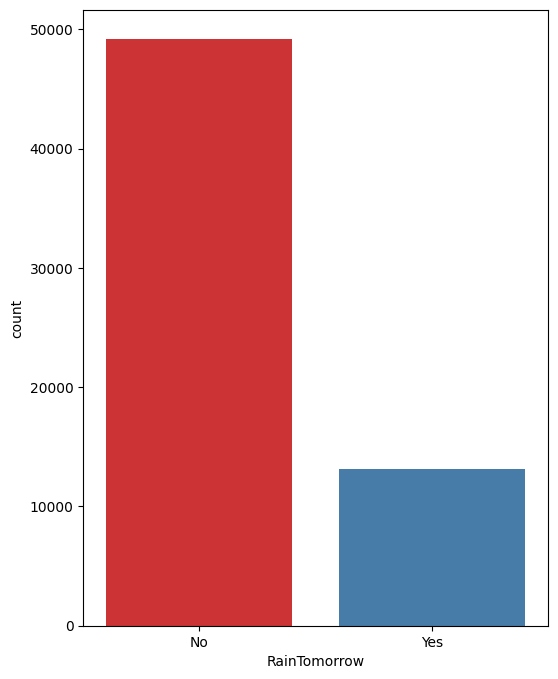

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")
plt.show()

The graph displays a comparison of two categories, ‘No’ and ‘Yes’, under the label ‘RainTomorrow’. The ‘No’ bar is significantly taller, indicating a higher count of days without rain, while the ‘Yes’ bar is shorter, showing fewer days with rain. This suggests that the data represents the frequency of rainy days versus non-rainy days, with non-rainy days being more common.

*HISTOGRAM*

In [ ]:

px.histogram(data, x='Location', color=data['RainToday'], title="Location vs Rainy days")

The bar graph with two sets of bars, one blue and one red, represents counts of a binary categorical data set across various categories, likely locations. The blue bars labeled “No” and the red bars labeled “Yes” could indicate the presence or absence of a condition, such as rain, for each location.

*scatter plot*

<Axes: xlabel='Temp9am', ylabel='MaxTemp'>

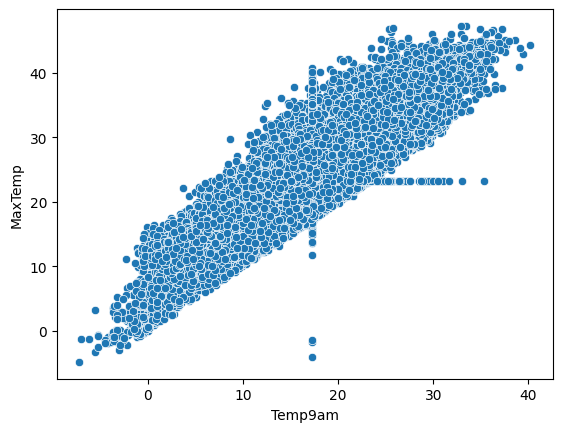

In [ ]:
sns.scatterplot(data ,x='Temp9am',y='MaxTemp')

The scatter plot graph displays a positive correlation between ‘Temp9am’ and ‘MaxTemp’, indicating that higher temperatures at 9 am are generally associated with higher maximum temperatures for the day.

In most of the cases, when it rain today, the temp difference between MinTemp and MaxTemp is not much.

*Correlation Heatmap*

<Axes: >

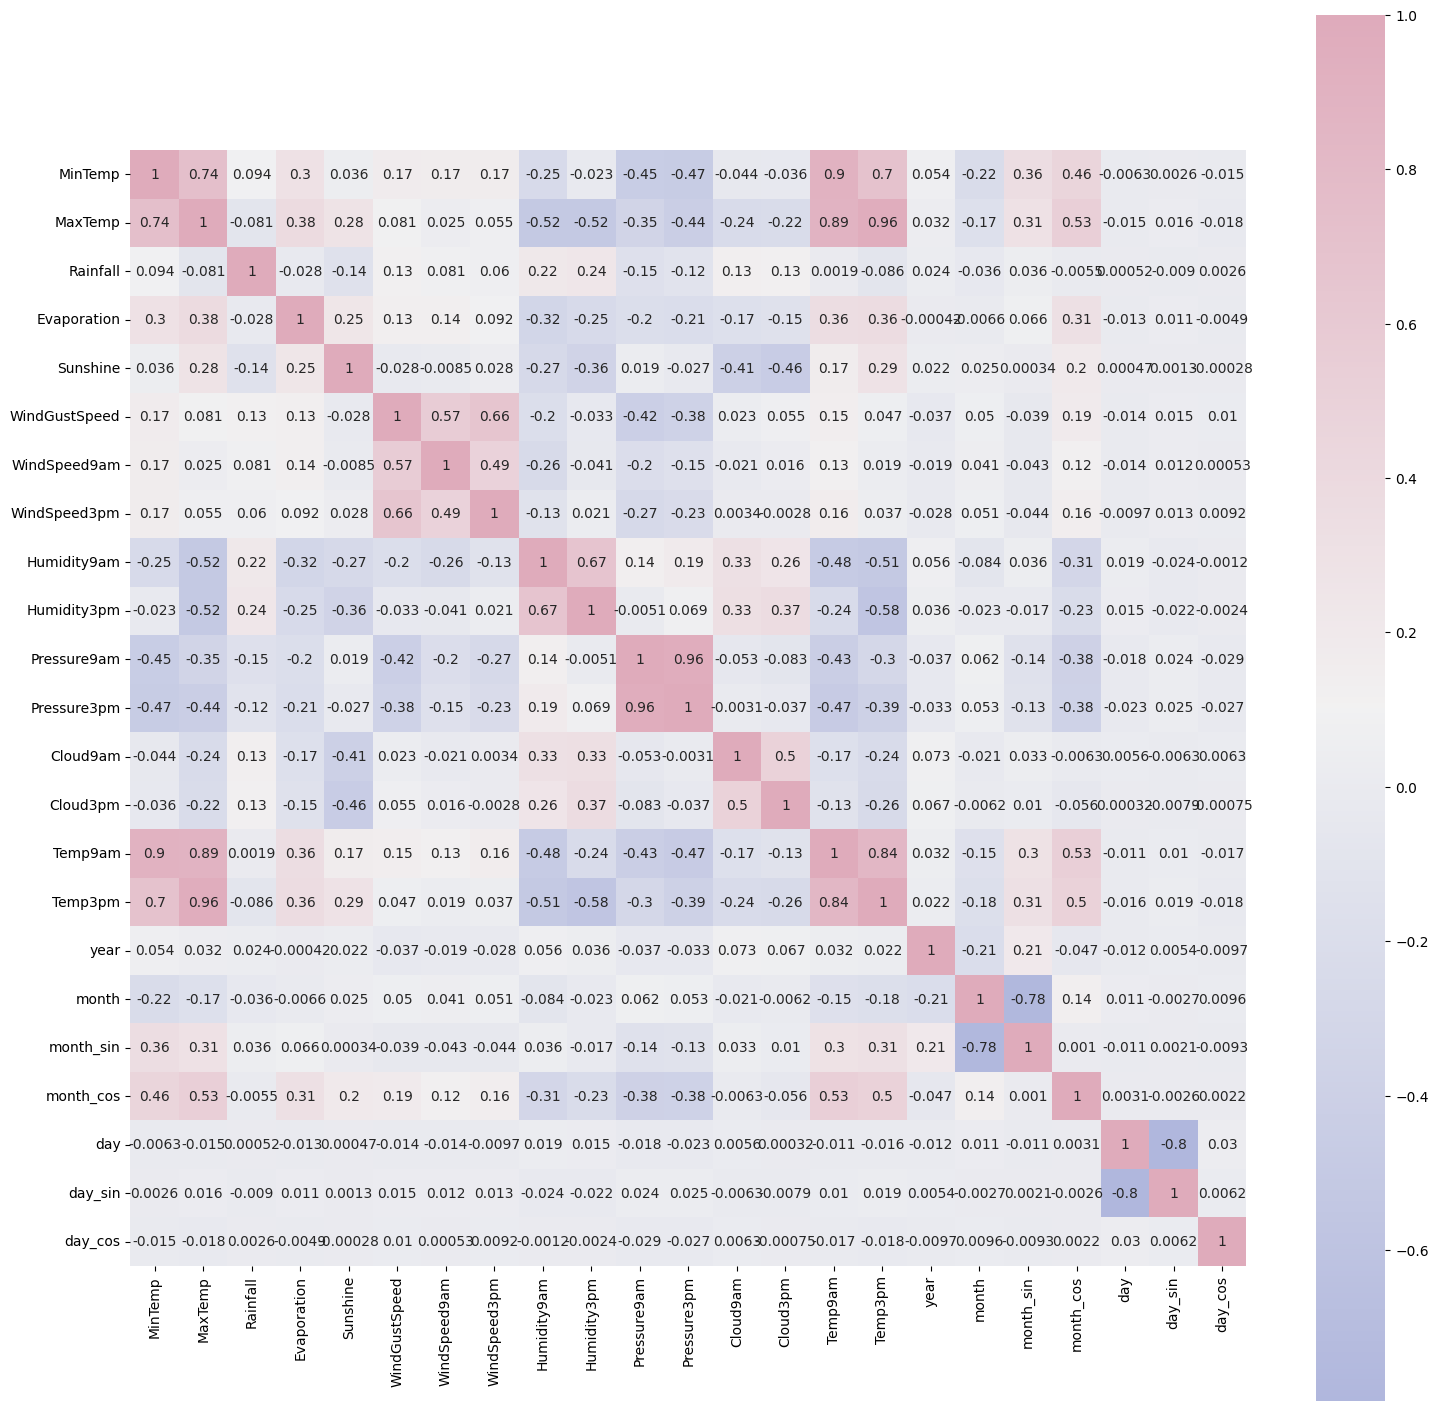

In [ ]:
# Correlation amongst numeric attributes
corrmat = data.select_dtypes(include=['float', 'int']).corr() # Select only numeric columns
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

The image shows a correlation matrix heatmap, which is used to display the correlation coefficients between variables. The colors indicate the strength and direction of the correlation, with blue for negative, red for positive, and white for no correlation. The scale from -1 to 1 reflects the range of the Pearson correlation coefficient.

# **Decision Tree**

Accuracy: 0.7984918979624579
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      9841
           1       0.52      0.48      0.50      2625

    accuracy                           0.80     12466
   macro avg       0.69      0.68      0.69     12466
weighted avg       0.79      0.80      0.80     12466



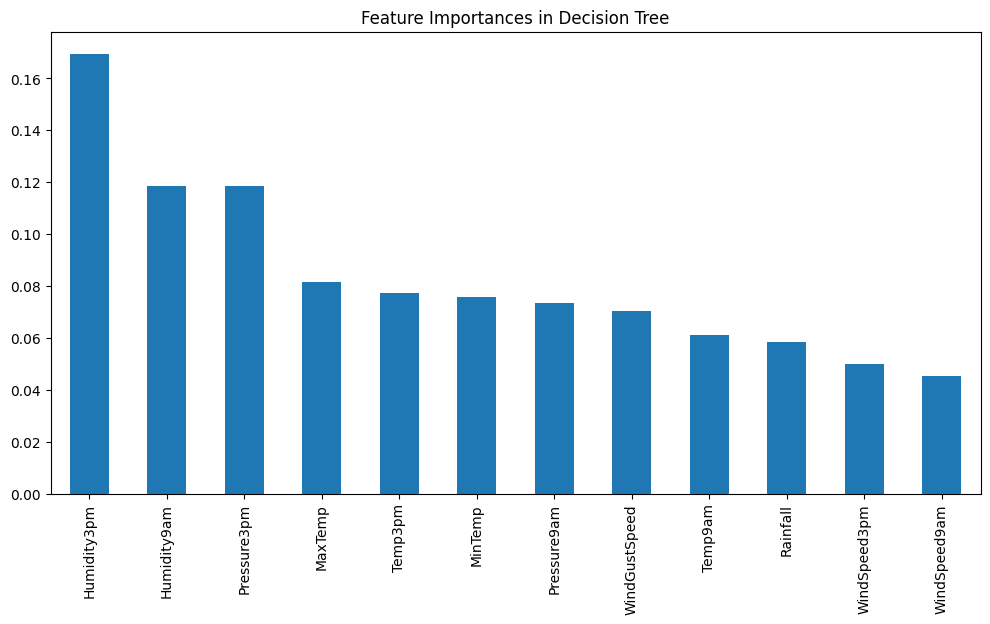

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Selecting relevant numeric features and the target variable (assuming 'RainTomorrow' is the target)
# Converting 'RainTomorrow' to numeric for classification (Yes = 1, No = 0)
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

features = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]
target = data['RainTomorrow']

# Ensure all data is numeric and handle missing values by dropping rows with missing values
data_cleaned = features.dropna()
target_cleaned = target[data_cleaned.index]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cleaned, target_cleaned, test_size=0.2, random_state=0)

# Applying Decision Tree model
params_dt = {'max_depth': 20,
             'max_features': "sqrt",
             'splitter':'best',
             'max_leaf_nodes':None}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt.fit(X_train, y_train)

# Predicting on test data
y_pred = model_dt.predict(X_test)

# Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred)
report_dt = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_dt}")
print("Classification Report:")
print(report_dt)

# Plotting feature importances
plt.figure(figsize=(12, 6))
feature_importances = pd.Series(model_dt.feature_importances_, index=features.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances in Decision Tree')
plt.show()


This output shoes a classification report, which includes metrics like accuracy, precision, recall, f1-score, and support for two classes. It also shows an ROC AUC score. On the right is a bar chart titled “**Feature Importances in Decision Tree**,” displaying various features with their importance scores. This visualization help us to understand the performance of a classification model and the significance of different features in making predictions.

# **K-Mean Cluster**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


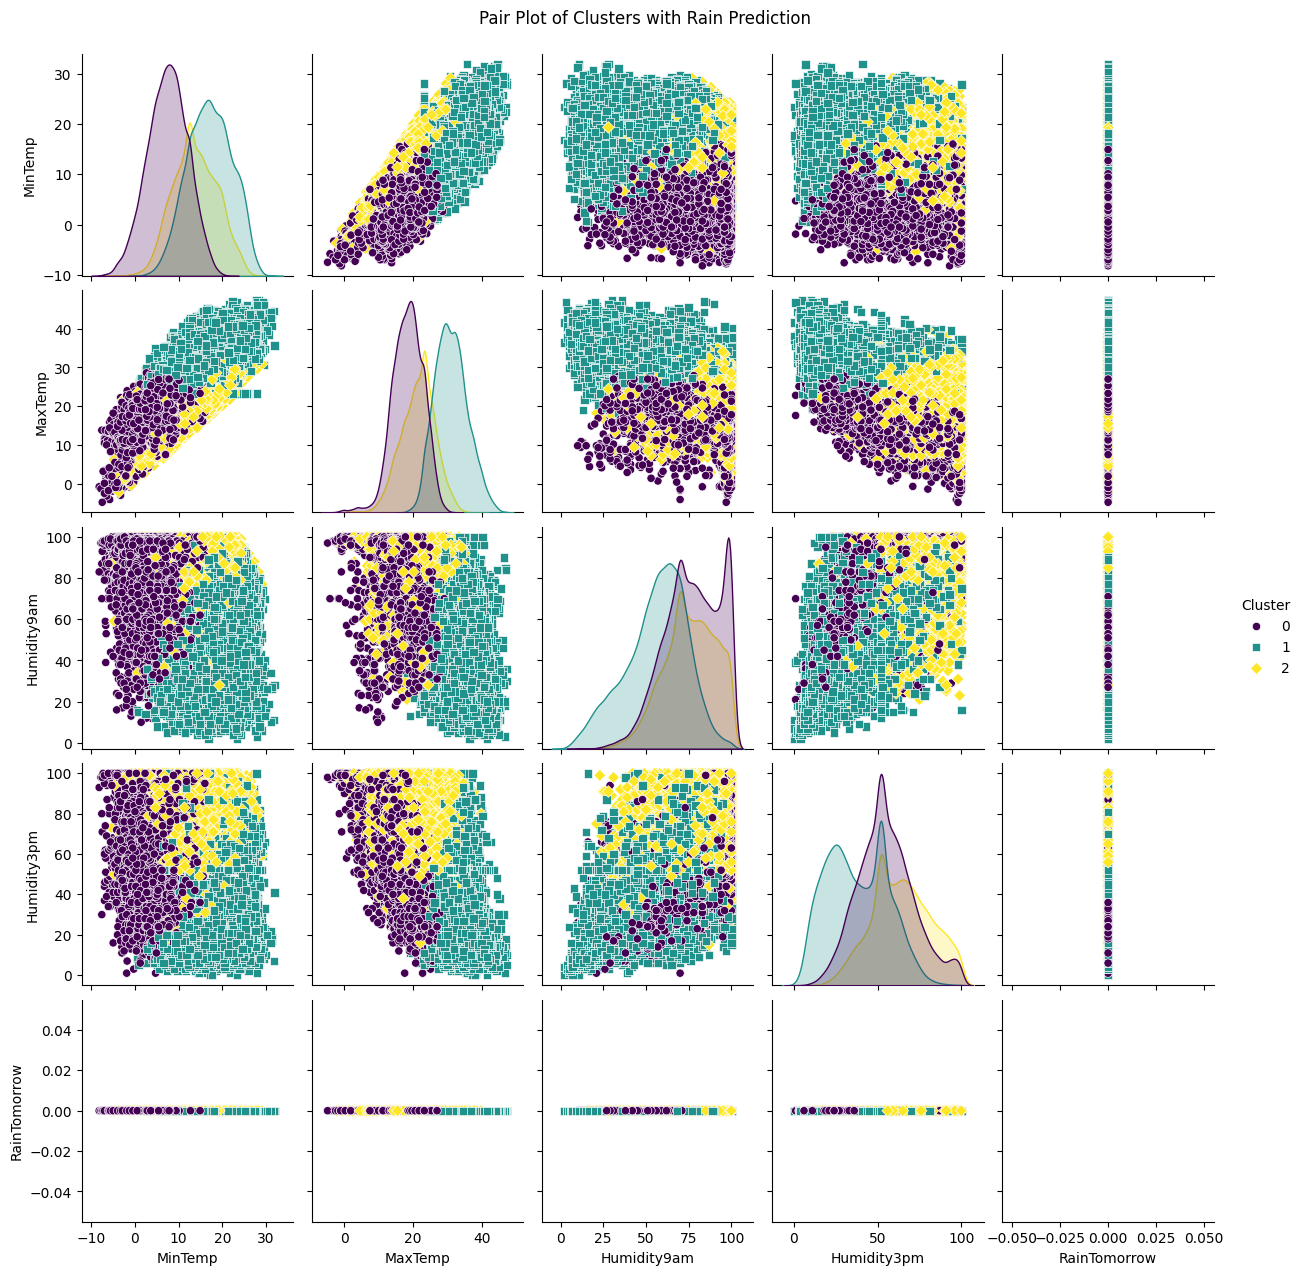

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features and the target
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
            'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
            'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']
target = 'RainTomorrow'

# Preprocess data
# Convert 'RainTomorrow' to numeric if it's not already
data[target] = data[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
data['Cluster'] = clusters


# Pair plot of selected features
selected_features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'RainTomorrow', 'Cluster']
pair_plot_df = data[selected_features]
sns.pairplot(pair_plot_df, hue='Cluster', palette='viridis', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Clusters with Rain Prediction', y=1.02)
plt.show()


The pair plot offers a thorough graphic representation of the relationship between meteorological characteristics and clustering and rain forecasts. It displays unique patterns among several clusters, denoted by diamonds, squares, and circles, which stand for various meteorological circumstances.
All things considered, this visualisation makes it easier to comprehend how various weather conditions match up with rain forecasts, emphasising the potential of clustering approaches to classify and analyse meteorological data for improved weather pattern interpretation and predictive modelling.

# **Artificial neural network (ANN)**

In [ ]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62327 entries, 0 to 62326
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           62327 non-null  datetime64[ns]
 1   Location       62327 non-null  int64         
 2   MinTemp        62327 non-null  float64       
 3   MaxTemp        62327 non-null  float64       
 4   Rainfall       62327 non-null  float64       
 5   Evaporation    62327 non-null  float64       
 6   Sunshine       62327 non-null  float64       
 7   WindGustDir    62327 non-null  int64         
 8   WindGustSpeed  62327 non-null  float64       
 9   WindDir9am     62327 non-null  int64         
 10  WindDir3pm     62327 non-null  int64         
 11  WindSpeed9am   62327 non-null  float64       
 12  WindSpeed3pm   62327 non-null  float64       
 13  Humidity9am    62327 non-null  float64       
 14  Humidity3pm    62327 non-null  float64       
 15  Pressure9am    6232

In [ ]:
# Prepairing attributes of scale data

features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,62327.0,-7.296153e-18,1.000008,-1.697043,-0.848521,0.000000,0.848521,1.697043
MinTemp,62327.0,-1.459231e-17,1.000008,-3.237813,-0.714013,-0.012957,0.719256,3.009372
MaxTemp,62327.0,-4.377692e-16,1.000008,-3.933283,-0.739593,-0.065063,0.705827,3.238754
Rainfall,62327.0,3.100865e-17,1.000008,-0.272518,-0.272518,-0.272518,-0.196569,31.018160
Evaporation,62327.0,-2.334769e-16,1.000008,-1.672980,-0.115267,-0.115267,-0.115267,41.763257
Sunshine,62327.0,-3.100865e-16,1.000008,-3.354302,0.146620,0.146620,0.146620,2.548415
WindGustDir,62327.0,6.566538e-17,1.000008,-1.703943,-0.852663,0.211437,0.849897,1.488357
WindGustSpeed,62327.0,1.527632e-16,1.000008,-2.502667,-0.655153,-0.193275,0.499543,7.350738
WindDir9am,62327.0,8.025769e-17,1.000008,-1.548805,-0.883192,0.004293,0.891778,1.779263
WindDir3pm,62327.0,-3.648077e-17,1.000008,-1.725583,-0.838957,0.047669,0.934296,1.599265


In [ ]:
#full data for
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(54546, 27)

BUILDING ANN

In [ ]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(54546, 26)

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
1091/1091 [==============================] - 4s 3ms/step - loss: 0.5442 - accuracy: 0.7931 - val_loss: 0.4082 - val_accuracy: 0.7925
Epoch 2/150
1091/1091 [==============================] - 3s 2ms/step - loss: 0.4271 - accuracy: 0.7933 - val_loss: 0.3940 - val_accuracy: 0.7925
Epoch 3/150
1091/1091 [==============================] - 3s 3ms/step - loss: 0.4170 - accuracy: 0.7933 - val_loss: 0.3881 - val_accuracy: 0.7925
Epoch 4/150
1091/1091 [==============================] - 3s 3ms/step - loss: 0.4104 - accuracy: 0.7933 - val_loss: 0.3852 - val_accuracy: 0.7925
Epoch 5/150
1091/1091 [==============================] - 2s 2ms/step - loss: 0.4090 - accuracy: 0.7933 - val_loss: 0.3832 - val_accuracy: 0.7925
Epoch 6/150
1091/1091 [==============================] - 2s 2ms/step - loss: 0.4063 - accuracy: 0.7933 - val_loss: 0.3817 - val_accuracy: 0.7925
Epoch 7/150
1091/1091 [==============================] - 3s 3ms/step - loss: 0.4044 - accuracy: 0.7933 - val_loss: 0.3805 - val_ac

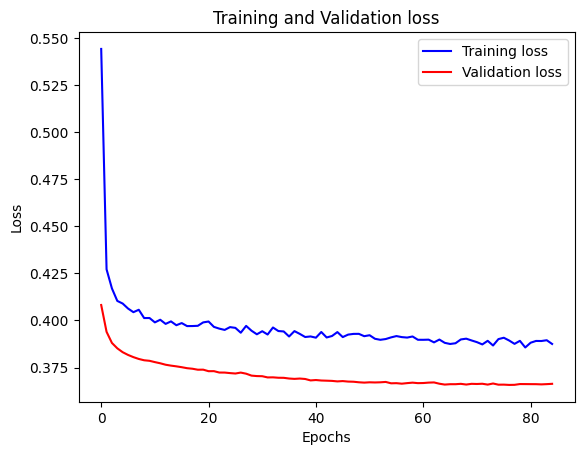

In [67]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "blue", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"red", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

The machine learning model's training and validation loss over epochs is represented as a graph. This is a thorough explanation:

Loss Representation Lines:
The training loss is shown by the blue line, which gets smaller as the number of epochs rises.

Red Line: Depicts the validity loss and indicates a gradual decline over time.

Axes:
X-axis: Known as "Epochs," this axis shows the total number of passes through the training dataset and is labelled from 0 to just over 80.
Y-axis: Known as "Loss," this axis represents the prediction inaccuracy of the model and runs from roughly 0.45 to little over 0.55.

Training Process: As seen by the declining loss values, the downward trend of both lines implies that the model is successfully learning from the data.

Code Snippet: The code snippet behind the graph indicates that the model will be used to predict results on a test set (X_test) following the training phase.


In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

341/341 [==============================] - 1s 2ms/step


<Axes: >

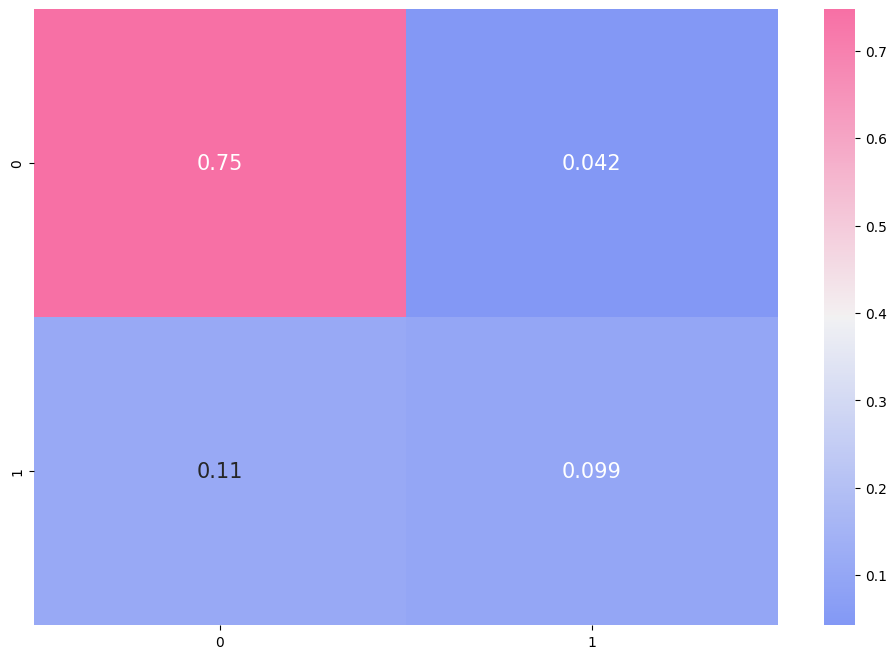

In [69]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=90, l=65, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

The matrix or heatmap including four quadrants. A numerical value is associated with each quadrant, and the colour intensity represents the size of that number. This is an explanation:

Upper Left Quadrant: With a value of 0.75, this region is the darkest tinted.
Top Right Quadrant: It correlates to a value of 0.042 and has a lighter tint.

Bottom Left Quadrant: A value of 0.11 is shown by this medium shade.
Bottom Right Quadrant: Its shade corresponds to a value of 0.099, much as the top right.
The matrix's axes have increments of 0.1 and span from -1 to 1.


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8620
           1       0.70      0.47      0.56      2290

    accuracy                           0.85     10910
   macro avg       0.79      0.71      0.74     10910
weighted avg       0.84      0.85      0.84     10910



The metrics table for machine learning classification models evaluation. This is an overview:

Precision and Recall: Precision gauges how well positive predictions are made, whereas recall evaluates how well all positive examples can be located.
F1-Score: The F1-score offers a balance between recall and precision by taking the harmonic mean of both.

Support: The number of real instances of each class in the dataset is shown in this column.
Regarding class "0":

Precision: 0.87
F1-Score: 0.91; Recall: 0.95
Assistance: 8620
Regarding class "1":

Accuracy: 0.70
F1-Score: 0.56 Recall: 0.47
Assistance: 2290
The model's overall accuracy, based on 10910 examples examined, is 0.85. The higher scores for class '0' indicate that the model is more accurate at class '0' identification than class '1'.


# **Conclusion**

Using a variety of machine learning approaches, this research sought to forecast rainfall in Australian cities. Key elements affecting rain forecasts were found by examining and preprocessing the data. Numerous models were used, such as Artificial Neural Networks (ANN), Decision Trees, and K-Means clustering. Using insights into feature relevance, the Decision Tree model produced a notably accurate result. Separate meteorological patterns associated with rain forecasts were identified by K-Means clustering. Based on training and validation loss graphs, the ANN showed promise for predictive modelling. Overall, these methods demonstrate how machine learning may be used to better analyse meteorological data and forecast weather.